In [42]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import itertools
import nltk
import pip
import wordcloud

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('D:\\DATA\\news.csv')
data.head()
print(data.shape)
data.describe()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
labels=data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

Tf-idf stands for term frequency-inverse document frequency
This is done by multiplying two metrics: how many times a word appears in a document (TF), and the inverse document frequency of the word across a set of documents (IDF).
TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document)
IDF(w) = log_e(Total number of documents / Number of documents with term w in it)


In [12]:
#Stop words are the most common words in a language that are to be filtered out before processing the natural language data.

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) #max_df - maximum document frequency

#Fit and transform train set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)   #learns vocabulary , idf and then convert it into document-term matrix 

#transform test set
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
vocabulary = tfidf_vectorizer.vocabulary_
idf = tfidf_vectorizer.idf_

# PassiveAggressiveClassifier

The passive-aggressive algorithms are a family of algorithms for large-scale learning.
If the prediction is right for an example, the model is approved. Otherwise, it is penalized by calculating the hinge loss and necessary updates are made to model to estimate the correct value for the corresponding example.
This algorithm is easy to execute in memeory for large streaming of data like twitter.

https://www.youtube.com/watch?v=TJU8NfDdqNQ

In [14]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [15]:
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


In [31]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[591,  47],
       [ 44, 585]], dtype=int64)

# NaiveBayes Classifier

Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
MultiNomialNB is used for discrete counts. we have processed the data based on count how often word occurs in the document and how often it is found accorss documents


In [33]:
nb_body = MultinomialNB()
nb_body.fit(tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
#Predict on the test set and calculate accuracy
y_pred=nb_body.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.06%


In [35]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[450, 188],
       [ 14, 615]], dtype=int64)

# SVM Classifier

In the SVM algorithm, each data item is plotted as a point in n-dimensional space (where n is number of features) with the value of each feature being the value of a particular coordinate. 
Classification is performed by finding the hyper-plane that differentiates the two classes.

In [45]:
clf = svm.SVC()
clf.fit(tfidf_train,y_train)

# the parameters decision_function_shape should be modified accordingly if it is multi-class classification
# kernel - allows us to perform linear , polynomial or custom - requires square matrix
#C - L2 regularization parameter

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred=clf.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


# Word cloud of spam words in the fake news 

[('the', 115086), (',', 108894), ('.', 84110), ('of', 60221), ('to', 58793), ('and', 52118), ('a', 40603), ('in', 36421), ('that', 28870), ('’', 27991), ('is', 26589), ('for', 18309), ('s', 16471), ('“', 16103), ('”', 15735), ('on', 15024), ('The', 13732), ('it', 13372), ('with', 12830), ('as', 12700), ('are', 12459), ('be', 11429), ('by', 11284), ('was', 11089), ('have', 10487), (':', 10370), ('not', 9853), ('I', 9691), ('this', 9493), ('from', 9055), ('has', 8999), (')', 7851), ('at', 7734), ('you', 7686), ('(', 7618), ('they', 7583), ('an', 7279), ('will', 6956), ('or', 6670), ('Clinton', 6656), ('we', 6539), ('he', 6489), ('their', 6466), ('Trump', 6447), ('who', 6068), ('his', 5834), ('?', 5633), ('all', 5379), ('about', 5348), ('been', 5125)]


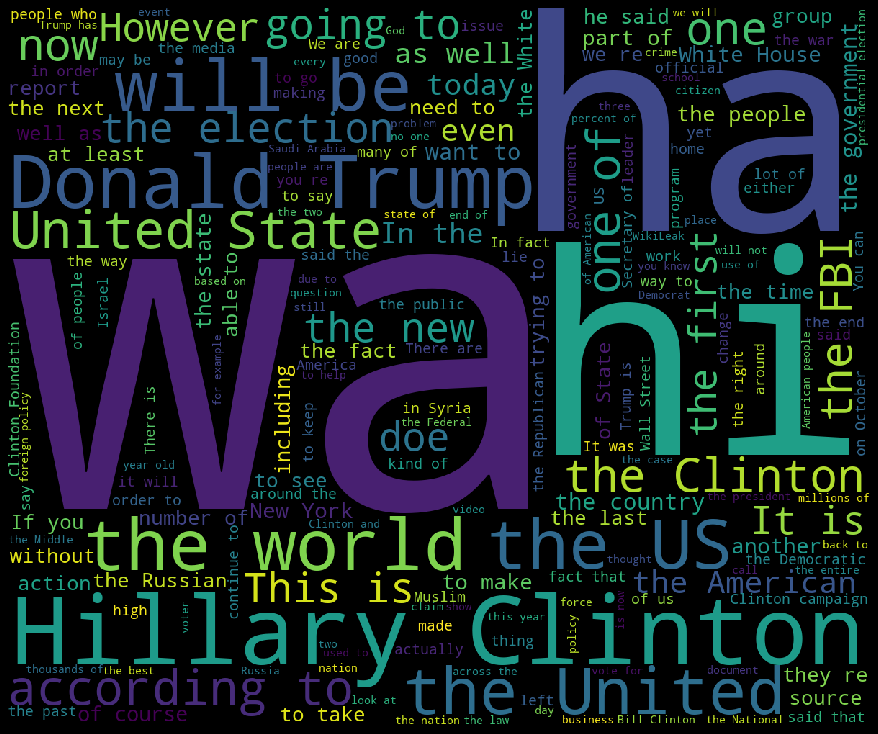

In [49]:
spam = data[data['label']=='FAKE']
spam_words = nltk.word_tokenize(" ".join(spam['text'].values.tolist()))
spam_counter = Counter(spam_words)
print(spam_counter.most_common(50))

spam_wordcloud = WordCloud(width=1200, height=1000, random_state = 42).generate(" ".join(spam_words))
# wordcloud2 = WordCloud(width=1200, height=1000, collocations = False).generate(" ".join(spam_words)) # to turn off bigrams

fig = plt.figure(figsize=(20,10), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()